In [1]:
import os
import datetime
import time
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch_geometric.loader.dataloader import DataLoader
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

from ClusterDatasetTransformer import ClusterDataset
from training import *
from data_statistics import *

from IPython.display import display

from Transformer import Transformer
from lang import Lang
from LossFunction import Loss

2025-05-21 16:26:59.849608: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 16:26:59.870996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747837619.896234    6359 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747837619.903882    6359 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-21 16:26:59.931608: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# CUDA Setup
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


In [3]:
input_length = 20
max_seq_length = 20
batch_size = 256
max_nodes = 66

In [4]:
converter = Lang(max_nodes)
vocab_size = converter.n_words

In [5]:
# Load the dataset
hist_folder = "/eos/user/c/czeh/histo/"
data_folder_training = "/eos/user/c/czeh/graph_data/processed"
store_folder_training = "/eos/user/c/czeh/graph_data_trans"
data_folder_test = "/eos/user/c/czeh/graph_data_test/processed"
store_folder_test = "/eos/user/c/czeh/graph_data_trans_test"

model_folder = "/eos/user/c/czeh/model"
dataset_training = ClusterDataset(converter, store_folder_training, data_folder_training, max_nodes=max_nodes, input_length=input_length)
dataset_test = ClusterDataset(converter, store_folder_test, data_folder_test, max_nodes=max_nodes, input_length=input_length)

In [6]:
train_dl = DataLoader(dataset_training, shuffle=True, batch_size=256)
test_dl = DataLoader(dataset_test, shuffle=True, batch_size=256)

In [12]:
epochs = 100
d_model = 128
num_heads = 2
num_layers = 6
d_ff = 512
dropout = 0.1
feature_num = dataset_test.get(10).x.shape[1]

# Model, loss, and optimizer
model = Transformer(dataset_test.get(10).num_nodes+1, vocab_size, d_model, num_heads, num_layers, d_ff, feature_num, max_nodes, max_seq_length, dropout).to(device)
# criterion = nn.CrossEntropyLoss(ignore_index=0)
criterion = Loss(converter)


# Optionally introduce weight decay
optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

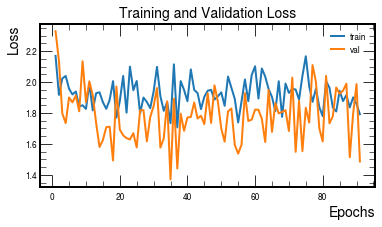

training: 100%|██████████| 61/61 [00:59<00:00,  1.02it/s]


Epoch 1, Loss: 2.169211


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 1, Val Loss: 2.513246


training: 100%|██████████| 61/61 [01:04<00:00,  1.06s/it]


Epoch 2, Loss: 1.916722


test: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


Epoch 2, Val Loss: 2.257315


training: 100%|██████████| 61/61 [01:01<00:00,  1.02s/it]


Epoch 3, Loss: 2.023460


test: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


Epoch 3, Val Loss: 0.644042


training: 100%|██████████| 61/61 [01:00<00:00,  1.02it/s]


Epoch 4, Loss: 2.039155


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 4, Val Loss: 2.021381


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 5, Loss: 1.956452


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 5, Val Loss: 2.576077


training: 100%|██████████| 61/61 [01:08<00:00,  1.12s/it]


Epoch 6, Loss: 1.919854


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 6, Val Loss: 0.908838


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 7, Loss: 1.938865


test: 100%|██████████| 20/20 [00:20<00:00,  1.05s/it]


Epoch 7, Val Loss: 2.166384


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 8, Loss: 1.842488


test: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


Epoch 8, Val Loss: 1.066583


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 9, Loss: 1.849830


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 9, Val Loss: 2.653592


training: 100%|██████████| 61/61 [01:03<00:00,  1.04s/it]


Epoch 10, Loss: 1.826699


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 10, Val Loss: 3.402212


training: 100%|██████████| 61/61 [01:28<00:00,  1.45s/it]


Epoch 11, Loss: 1.989516


test: 100%|██████████| 20/20 [00:21<00:00,  1.05s/it]


Epoch 11, Val Loss: 1.074079


training: 100%|██████████| 61/61 [01:01<00:00,  1.00s/it]


Epoch 12, Loss: 1.816850


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 12, Val Loss: 0.777484


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 13, Loss: 1.927583


test: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


Epoch 13, Val Loss: 2.329440


training: 100%|██████████| 61/61 [01:02<00:00,  1.02s/it]


Epoch 14, Loss: 1.933821


test: 100%|██████████| 20/20 [00:22<00:00,  1.11s/it]


Epoch 14, Val Loss: 0.890572


training: 100%|██████████| 61/61 [01:08<00:00,  1.13s/it]


Epoch 15, Loss: 1.869553


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 15, Val Loss: 0.715398


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 16, Loss: 1.827080


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 16, Val Loss: 1.384456


training: 100%|██████████| 61/61 [01:04<00:00,  1.05s/it]


Epoch 17, Loss: 1.884495


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 17, Val Loss: 0.986414


training: 100%|██████████| 61/61 [01:04<00:00,  1.05s/it]


Epoch 18, Loss: 2.006044


test: 100%|██████████| 20/20 [00:22<00:00,  1.15s/it]


Epoch 18, Val Loss: 2.905474


training: 100%|██████████| 61/61 [01:07<00:00,  1.11s/it]


Epoch 19, Loss: 1.769730


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 19, Val Loss: 3.563042


training: 100%|██████████| 61/61 [01:00<00:00,  1.00it/s]


Epoch 20, Loss: 1.876782


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 20, Val Loss: 2.032840


training: 100%|██████████| 61/61 [01:03<00:00,  1.04s/it]


Epoch 21, Loss: 2.039540


test: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


Epoch 21, Val Loss: 2.435917


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 22, Loss: 1.802117


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 22, Val Loss: 1.031104


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 23, Loss: 2.099821


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 23, Val Loss: 1.373687


training: 100%|██████████| 61/61 [01:02<00:00,  1.02s/it]


Epoch 24, Loss: 1.947352


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 24, Val Loss: 0.982560


training: 100%|██████████| 61/61 [01:05<00:00,  1.08s/it]


Epoch 25, Loss: 2.006896


test: 100%|██████████| 20/20 [00:21<00:00,  1.07s/it]


Epoch 25, Val Loss: 1.166765


training: 100%|██████████| 61/61 [01:02<00:00,  1.02s/it]


Epoch 26, Loss: 1.797671


test: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


Epoch 26, Val Loss: 2.132934


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 27, Loss: 1.899727


test: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


Epoch 27, Val Loss: 1.908327


training: 100%|██████████| 61/61 [01:03<00:00,  1.03s/it]


Epoch 28, Loss: 1.871309


test: 100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


Epoch 28, Val Loss: 0.951593


training: 100%|██████████| 61/61 [01:08<00:00,  1.12s/it]


Epoch 29, Loss: 1.831347


test: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


Epoch 29, Val Loss: 1.077870


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 30, Loss: 1.938790


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 30, Val Loss: 2.138085


training: 100%|██████████| 61/61 [01:01<00:00,  1.00s/it]


Epoch 31, Loss: 2.097953


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 31, Val Loss: 3.129420


training: 100%|██████████| 61/61 [01:08<00:00,  1.12s/it]


Epoch 32, Loss: 1.908973


test: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


Epoch 32, Val Loss: 2.519973


training: 100%|██████████| 61/61 [01:07<00:00,  1.11s/it]


Epoch 33, Loss: 1.814286


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 33, Val Loss: 1.690197


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 34, Loss: 1.869915


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 34, Val Loss: 2.562481


training: 100%|██████████| 61/61 [01:03<00:00,  1.04s/it]


Epoch 35, Loss: 1.734102


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 35, Val Loss: 2.748575


training: 100%|██████████| 61/61 [01:08<00:00,  1.12s/it]


Epoch 36, Loss: 2.114472


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 36, Val Loss: 4.364677


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 37, Loss: 1.706837


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 37, Val Loss: 0.964961


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 38, Loss: 2.006067


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 38, Val Loss: 0.924243


training: 100%|██████████| 61/61 [01:03<00:00,  1.04s/it]


Epoch 39, Loss: 1.949049


test: 100%|██████████| 20/20 [00:20<00:00,  1.05s/it]


Epoch 39, Val Loss: 1.163084


training: 100%|██████████| 61/61 [01:11<00:00,  1.17s/it]


Epoch 40, Loss: 1.875874


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 40, Val Loss: 2.619199


training: 100%|██████████| 61/61 [01:01<00:00,  1.00s/it]


Epoch 41, Loss: 2.081872


test: 100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


Epoch 41, Val Loss: 2.649615


training: 100%|██████████| 61/61 [01:04<00:00,  1.05s/it]


Epoch 42, Loss: 1.949530


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 42, Val Loss: 2.376628


training: 100%|██████████| 61/61 [01:01<00:00,  1.00s/it]


Epoch 43, Loss: 1.928567


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 43, Val Loss: 2.072248


training: 100%|██████████| 61/61 [01:03<00:00,  1.05s/it]


Epoch 44, Loss: 1.824839


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 44, Val Loss: 1.028091


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 45, Loss: 1.905234


test: 100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


Epoch 45, Val Loss: 3.165580


training: 100%|██████████| 61/61 [01:07<00:00,  1.11s/it]


Epoch 46, Loss: 1.943738


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 46, Val Loss: 0.974571


training: 100%|██████████| 61/61 [01:23<00:00,  1.37s/it]


Epoch 47, Loss: 1.949482


training: 100%|██████████| 61/61 [01:08<00:00,  1.12s/it]


Epoch 49, Loss: 1.907987


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 49, Val Loss: 3.241323


training: 100%|██████████| 61/61 [01:03<00:00,  1.05s/it]


Epoch 50, Loss: 1.933343


test: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


Epoch 50, Val Loss: 1.905235


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 51, Loss: 1.846248


test: 100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


Epoch 51, Val Loss: 2.281444


training: 100%|██████████| 61/61 [01:07<00:00,  1.10s/it]


Epoch 52, Loss: 2.035751


test: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


Epoch 52, Val Loss: 3.013691


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 53, Loss: 1.962970


test: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


Epoch 53, Val Loss: 3.024418


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 54, Loss: 1.891067


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 54, Val Loss: 0.865649


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 55, Loss: 1.738968


test: 100%|██████████| 20/20 [00:21<00:00,  1.10s/it]


Epoch 55, Val Loss: 2.321931


training: 100%|██████████| 61/61 [00:59<00:00,  1.03it/s]


Epoch 56, Loss: 1.875295


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 56, Val Loss: 2.256395


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 57, Loss: 2.016697


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 57, Val Loss: 0.748461


training: 100%|██████████| 61/61 [01:05<00:00,  1.07s/it]


Epoch 58, Loss: 1.876287


test: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


Epoch 58, Val Loss: 2.024835


training: 100%|██████████| 61/61 [01:09<00:00,  1.13s/it]


Epoch 59, Loss: 2.045246


test: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


Epoch 59, Val Loss: 0.967717


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 60, Loss: 2.101969


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 60, Val Loss: 3.625772


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 61, Loss: 1.893401


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 61, Val Loss: 3.742743


training: 100%|██████████| 61/61 [01:01<00:00,  1.00s/it]


Epoch 62, Loss: 2.087791


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 62, Val Loss: 1.427464


training: 100%|██████████| 61/61 [01:08<00:00,  1.12s/it]


Epoch 63, Loss: 2.035371


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 63, Val Loss: 1.642602


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 64, Loss: 1.954583


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 64, Val Loss: 1.394564


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 65, Loss: 1.903536


test: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


Epoch 65, Val Loss: 1.927528


training: 100%|██████████| 61/61 [01:07<00:00,  1.11s/it]


Epoch 67, Loss: 2.005249


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 67, Val Loss: 1.325151


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 68, Loss: 1.774920


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 68, Val Loss: 0.778217


training: 100%|██████████| 61/61 [00:59<00:00,  1.02it/s]


Epoch 69, Loss: 1.990079


test: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


Epoch 69, Val Loss: 3.829056


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 70, Loss: 1.929992


test: 100%|██████████| 20/20 [00:22<00:00,  1.11s/it]


Epoch 70, Val Loss: 1.361629


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 71, Loss: 1.956138


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 71, Val Loss: 2.733120


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 72, Loss: 1.951573


test: 100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


Epoch 72, Val Loss: 1.271663


training: 100%|██████████| 61/61 [01:04<00:00,  1.06s/it]


Epoch 73, Loss: 1.887040


test: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


Epoch 73, Val Loss: 1.268654


training: 100%|██████████| 61/61 [01:09<00:00,  1.13s/it]


Epoch 74, Loss: 2.038687


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 74, Val Loss: 1.709218


training: 100%|██████████| 61/61 [01:05<00:00,  1.07s/it]


Epoch 75, Loss: 2.166651


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 75, Val Loss: 4.550251


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 76, Loss: 1.973887


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 76, Val Loss: 0.986168


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 79, Loss: 1.838011


test: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


Epoch 79, Val Loss: 0.893886


training: 100%|██████████| 61/61 [01:00<00:00,  1.00it/s]


Epoch 80, Loss: 1.779325


test: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Epoch 80, Val Loss: 4.336529


training: 100%|██████████| 61/61 [01:04<00:00,  1.05s/it]


Epoch 81, Loss: 2.006262


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 81, Val Loss: 2.722903


training: 100%|██████████| 61/61 [01:20<00:00,  1.33s/it]


Epoch 82, Loss: 1.963192


test: 100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


Epoch 82, Val Loss: 1.031253


training: 100%|██████████| 61/61 [00:59<00:00,  1.03it/s]


Epoch 83, Loss: 1.834793


test: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


Epoch 83, Val Loss: 3.323650


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 84, Loss: 1.809702


test: 100%|██████████| 20/20 [00:21<00:00,  1.05s/it]


Epoch 84, Val Loss: 0.722290


training: 100%|██████████| 61/61 [01:01<00:00,  1.01s/it]


Epoch 85, Loss: 1.943730


test: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


Epoch 85, Val Loss: 1.872915


training: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


Epoch 86, Loss: 1.877068


test: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


Epoch 86, Val Loss: 4.752233


training: 100%|██████████| 61/61 [00:59<00:00,  1.03it/s]


Epoch 87, Loss: 1.915512


test: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Epoch 87, Val Loss: 1.603204


training: 100%|██████████| 61/61 [01:07<00:00,  1.11s/it]


Epoch 88, Loss: 1.836145


test: 100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


Epoch 88, Val Loss: 0.802495


training: 100%|██████████| 61/61 [01:04<00:00,  1.06s/it]


Epoch 89, Loss: 1.900928


test: 100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


Epoch 89, Val Loss: 3.226069


training: 100%|██████████| 61/61 [01:02<00:00,  1.03s/it]


Epoch 90, Loss: 1.858340


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 90, Val Loss: 1.147453


training: 100%|██████████| 61/61 [01:04<00:00,  1.05s/it]


Epoch 91, Loss: 1.791874


test: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Epoch 91, Val Loss: 1.001391


training:  67%|██████▋   | 41/61 [00:41<00:21,  1.09s/it]

In [ ]:
train_loss_hist = []
val_loss_hist = []
# Optionally introduce gradient clipping
# torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

#Initialize Variables for EarlyStopping
best_loss = float('inf')
best_model_weights = None
patience = 10

fig_loss, ax_loss = plt.subplots(1, 1)
fig_loss.set_figwidth(6)
fig_loss.set_figheight(3)

display_loss = display(1, display_id=True)

optimizer.zero_grad()
# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    val_loss = 0
    
    for sample in tqdm(train_dl, desc="training"):
        output = model(sample[0].to(device), sample[1].to(device))
#             loss = criterion(output.contiguous().view(-1, vocab_size), target_tensor.contiguous().view(-1), output.argmax(-1)[0, -1].item(), sample[i].input, sample[i].group)
#         loss = criterion(output.contiguous().view(-1, vocab_size), sample[2].to(device).contiguous().view(-1))
        loss = criterion(output.contiguous().view(-1, vocab_size), sample[3].to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    loss = total_loss / len(train_dl)
    print(f"Epoch {epoch+1}, Loss: {loss:.6f}")
    train_loss_hist.append(loss)
    
    model.eval()
    for sample in tqdm(test_dl, desc="test"): 
        output = model(sample[0].to(device), sample[1].to(device))
        loss = criterion(output.contiguous().view(-1, vocab_size), sample[3].to(device))
#         loss = criterion(output.contiguous().view(-1, vocab_size), sample[2].to(device).contiguous().view(-1))
        loss.backward()
        optimizer.step()
        val_loss += loss.item()
        
    val_loss = val_loss / len(test_dl)
    print(f"Epoch {epoch+1}, Val Loss: {loss:.6f}")
    val_loss_hist.append(val_loss)
    
    ax_loss.clear()
    plot_loss(train_loss_hist, val_loss_hist, ax=ax_loss)
    display_loss.update(fig_loss)
    time.sleep(1)
        
        
        
    # Early stopping
#     if loss < best_loss:
#         best_loss = val_loss
#         best_model_weights = copy.deepcopy(model.state_dict())  # Deep copy here      
#         patience = 10  # Reset patience counter
#     else:
#         patience -= 1
#         if patience == 0:
#             break
            
# Load the best model weights
# model.load_state_dict(best_model_weights)

In [ ]:
correct = 0
model.eval() 
torch.no_grad()
i = 0
for sample in tqdm(test_dl, desc="test"):
    input_tensor = torch.zeros((1, input_length), dtype=torch.long).to(device)
    target_tensor = torch.zeros((1, input_length), dtype=torch.long).to(device)
    edge_tensor = torch.zeros((1, sample.x.shape[0], feature_num), dtype=torch.float).to(device)

    input_tensor[0, :] = torch.tensor(sample[i].input, dtype=torch.long)
    target_tensor[0, :] = torch.tensor(sample[i].y_trans, dtype=torch.long)
    edge_tensor[0, :] = torch.unsqueeze(sample.x, dim=0).float()
            
    predictions = model(edge_tensor, input_tensor)
    predicted_index = predictions.argmax(-1)
    predicted_number = predicted_index[0, -1].item()
#     res = torch.roll(input_tensor, predicted_number, dims=1)

#     step = 0
#     while (predicted_number != 2 and step < 100):  # Disable gradient computation for inference
#         input_tensor = torch.roll(input_tensor, -1, dims=1)
#         input_tensor[0, -1] = predicted_number
    
#         predictions = model(edge_tensor, input_tensor)
#         predicted_index = predictions.argmax(-1)  # Get the index of the max log-probability for the last position
#         predicted_number = predicted_index[0, -1].item()  # Convert to Python number
#         res.append(predicted_number)
#         step += 1
     
#     input_tensor = torch.roll(input_tensor, -1, dims=1)
#     input_tensor[0, -1] = predicted_number 
#     check = converter.arr2seq(input_tensor[0]) == converter.arr2seq(converter.subseq2arr(sample[0].y, input_length, 0, input_length))
    
    print(f"Input Sequence: {sample[0].input}")
    print(f"Predicted: {predicted_number}")
    print(f"Real: {sample[i].y_trans[-1]}")
#     print(f"Predicted Sequence: {converter.seq2y(np.array(res.cpu()))}")
#     print(f"Correct: {check}")
    
#     try:
#         origG = torch_geometric.utils.to_networkx(sample, to_undirected=True)
#         res_nodes, res_edges = sequenceToGraph(converter.arr2seq(input_tensor[0], ignoreTokens=True))
#         newData = Data(x=sample.x, num_nodes=sample.num_nodes, edge_index=torch.from_numpy(res_edges))
#         G = torch_geometric.utils.to_networkx(newData, to_undirected=True)

#         fig, ax = plt.subplots(1, 2)
#         nx.draw_circular(origG, with_labels=True, ax=ax[0])
#         nx.draw_circular(G, with_labels=True, ax=ax[1])
#     except:
#         print("incorrect sequence")
    
    
#     correct += check

# print(f"Percentage of correct guesses: {correct / (len(test_dl))}")

In [ ]:
torch.save({'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'training_loss': loss
            }, "/eos/user/c/czeh/tranformer_2.pt")
